# Challenge Set 8
---
## Brendon Happ
## Metis Fall 2018 NYC

In [156]:
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Challenge 1
---
For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [157]:
df_vote=pd.read_csv(url,
               names = ['f' + str(x) for x in range(1,18)])
for col in df_vote.columns[1:]:
    df_vote[col] = df_vote[col].map({'y':1,'n':0})
    df_vote[col].fillna(df_vote[col].mode()[0], inplace=True)

In [158]:
X = df_vote.iloc[:,1:]
y = df_vote.iloc[:,0]
y = label_binarize(y, classes=['republican', 'democrat']).reshape(-1)

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

In [160]:
model_list = [KNeighborsClassifier(5),
              LogisticRegression(),
              GaussianNB(),
              SVC(),
              DecisionTreeClassifier(),
              RandomForestClassifier()]

In [161]:
def get_aprf1_table(model_list, X_train, y_train, X_test, y_test):
    '''
    Takes models and scoring data and returns a dataframe with precision,
    accuracy, recall, and f1 scores for all models
    '''
    df = defaultdict(list)
    for model in model_list:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df['Accuracy'].append(accuracy_score(y_test,y_pred))
        df['Precision_R'].append(precision_score(y_test,y_pred,pos_label=0))
        df['Precision_D'].append(precision_score(y_test,y_pred,pos_label=1))
        df['Recall_R'].append(recall_score(y_test,y_pred,pos_label=0))
        df['Recall_D'].append(recall_score(y_test,y_pred,pos_label=1))
        df['F1_R'].append(f1_score(y_test,y_pred,pos_label=0))
        df['F1_D'].append(f1_score(y_test,y_pred,pos_label=1))
        
    return pd.DataFrame(df, index=[str(model).split('(')[0] for model in model_list])
        

In [162]:
get_aprf1_table(model_list, X_train, y_train, X_test, y_test)

,Accuracy,Precision_R,Precision_D,Recall_R,Recall_D,F1_R,F1_D
KNeighborsClassifier,0.916031,0.905660,0.923077,0.888889,0.935065,0.897196,0.929032
LogisticRegression,0.938931,0.960000,0.925926,0.888889,0.974026,0.923077,0.949367
GaussianNB,0.938931,0.960000,0.925926,0.888889,0.974026,0.923077,0.949367
SVC,0.954198,0.961538,0.949367,0.925926,0.974026,0.943396,0.961538
DecisionTreeClassifier,0.931298,0.924528,0.935897,0.907407,0.948052,0.915888,0.941935
RandomForestClassifier,0.954198,0.961538,0.949367,0.925926,0.974026,0.943396,0.961538


### Challenge 2
---
For each, draw the ROC curve and calculate the AUC.



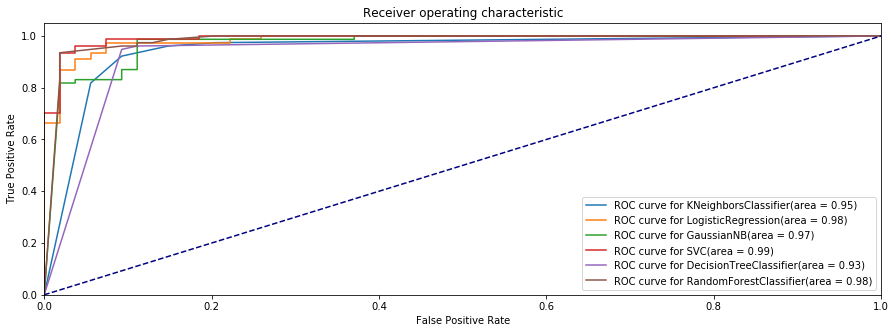

In [163]:
plt.figure(figsize=(15,5))
lw = 1.5
for model in model_list:
        if str(model).split('(')[0] == 'SVC':
            model.probability=True
        model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_test)[:,1]
        # Compute ROC curve and ROC area for each class
        fpr = []
        tpr = []
        roc_auc = []
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr,
         lw=lw, label='ROC curve for {0}(area = {1:0.2f})'.format(str(model).split('(')[0],roc_auc))
        
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show();

### Challenge 3
---
Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9).

In [194]:
score_list = ['accuracy', 'precision', 'recall', 'f1']
def get_cv_aprf1_table(model_list, score_list, X, y):
    '''
    Takes models and scoring data and returns a dataframe with precision,
    accuracy, recall, and f1 scores for all models
    '''
    df = defaultdict(list)
    for model in model_list:
        for score in score_list:
            df[str(score)].append(np.mean(cross_val_score(model, X, y, scoring=score)))
        
    return pd.DataFrame(df, index=[str(model).split('(')[0] for model in model_list])

In [167]:
get_cv_aprf1_table(model_list, score_list, X, y)

,accuracy,precision,recall,f1
KNeighborsClassifier,0.919540,0.949772,0.917603,0.933327
LogisticRegression,0.960920,0.966828,0.970037,0.968099
GaussianNB,0.926437,0.940777,0.940075,0.939934
SVC,0.956322,0.980868,0.947566,0.963644
DecisionTreeClassifier,0.928736,0.972380,0.932584,0.946147
RandomForestClassifier,0.960920,0.980741,0.943820,0.959482


### Challenge 4
---
For your movie classifiers, calculate the precision and recall for each class.

In [214]:
movie_df = pd.read_csv('2013_movies.csv')
movie_df = movie_df.dropna()
X = movie_df[['Budget', 'DomesticTotalGross', 'Runtime']]
y = movie_df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)
movie_df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [220]:
def get_aprf1_table(model_list, X_train, y_train, X_test, y_test):
    '''
    Takes models and scoring data and returns a dataframe with precision,
    accuracy, recall, and f1 scores for all models
    '''
    df = defaultdict(list)
    for model in model_list:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df['Precision_PG'].append(precision_score(y_test,y_pred,labels=['PG'], average=None))
        df['Precision_PG13'].append(precision_score(y_test,y_pred,labels=['PG-13'], average=None))
        df['Precision_R'].append(precision_score(y_test,y_pred,labels=['R'], average=None))

        df['Recall_PG'].append(recall_score(y_test,y_pred,labels=['PG'], average=None))
        df['Recall_PG13'].append(recall_score(y_test,y_pred, labels=['PG-13'], average=None))
        df['Recall_R'].append(recall_score(y_test,y_pred, labels=['R'], average=None))

    return pd.DataFrame(df, index=[str(model).split('(')[0] for model in model_list])


In [221]:
get_aprf1_table(model_list, X_train, y_train, X_test, y_test)

/Users/brendonhapp/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/brendonhapp/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/brendonhapp/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/brendonhapp/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, wa

,Precision_PG,Precision_PG13,Precision_R,Recall_PG,Recall_PG13,Recall_R
KNeighborsClassifier,[0.0],[0.5],[0.666666666667],[0.0],[0.636363636364],[0.727272727273]
LogisticRegression,[0.0],[0.409090909091],[0.6],[0.0],[0.818181818182],[0.272727272727]
GaussianNB,[0.0],[0.363636363636],[0.5],[0.0],[0.363636363636],[0.727272727273]
SVC,[0.0],[0.407407407407],[0.0],[0.0],[1.0],[0.0]
DecisionTreeClassifier,[0.0],[0.363636363636],[0.428571428571],[0.0],[0.363636363636],[0.545454545455]
RandomForestClassifier,[0.0],[0.466666666667],[0.545454545455],[0.0],[0.636363636364],[0.545454545455]


### Challenge 5
---
Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

In [222]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
hab_df=pd.read_csv(url,
               names = ['f1', 'f2', 'f3', 't'])


In [233]:
X = hab_df.iloc[:,:3]
y = hab_df.iloc[:,3]
y = label_binarize(y, classes=[1, 2]).reshape(-1)

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, random_state=4444)

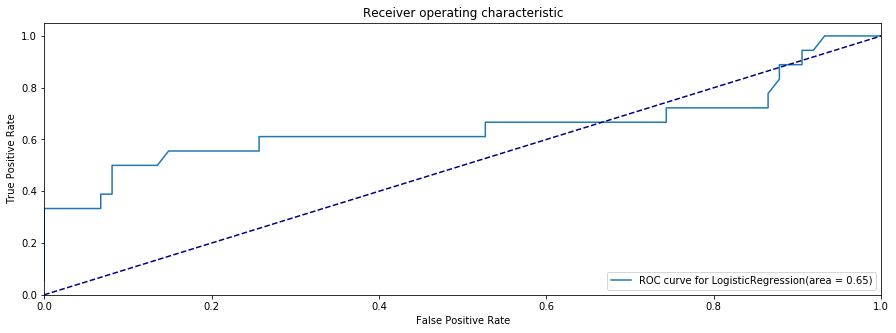

In [237]:
plt.figure(figsize=(15,5))
lw = 1.5
 
LogisticRegression().fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:,1]
# Compute ROC curve and ROC area for each class
fpr = []
tpr = []
roc_auc = []
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,
         lw=lw, label='ROC curve for {0}(area = {1:0.2f})'.format(str(model).split('(')[0],roc_auc))
        
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show();